In [232]:
import requests
import json
import numpy as np
import matplotlib.pyplot as pl

from my_scopus import MY_API_KEY

%matplotlib inline

In [233]:
def citations_per_paper(author_id):

    url='http://api.elsevier.com/content/author?author_id='+str(author_id)+'&view=metrics'

    resp =  requests.get(url,headers={'Accept':'application/json','X-ELS-APIKey': MY_API_KEY})
                 
    cites = int(resp.json()['author-retrieval-response'][0]['coredata']['citation-count'])

    papers = int(resp.json()['author-retrieval-response'][0]['coredata']['document-count'])

    hindex = int(resp.json()['author-retrieval-response'][0]['h-index'])

    #print(cites, papers, cites/papers, hindex)
    return cites, papers, cites/papers, hindex

In [234]:
citations_per_paper(6602678643)

(215, 19, 11.31578947368421, 8)

In [235]:
def get_all_papers(author_id):
    
    url = 'http://api.elsevier.com/content/search/scopus?query=AU-ID('+str(author_id)+')&field=dc:identifier&count=100'
    
    resp = requests.get(url,headers={'Accept':'application/json','X-ELS-APIKey': MY_API_KEY})

    results = resp.json()

    print([[str(r['dc:identifier'])] for r in results['search-results']["entry"]])
    return [[str(r['dc:identifier'])] for r in results['search-results']["entry"]]


In [236]:
all_papers = get_all_papers(25636210900)

[['SCOPUS_ID:85041127735'], ['SCOPUS_ID:85021088817'], ['SCOPUS_ID:85021122841'], ['SCOPUS_ID:85017648514'], ['SCOPUS_ID:85010076979'], ['SCOPUS_ID:85014721665'], ['SCOPUS_ID:84988892940'], ['SCOPUS_ID:84976534048'], ['SCOPUS_ID:84992080675'], ['SCOPUS_ID:85006847126'], ['SCOPUS_ID:84929120222'], ['SCOPUS_ID:84934907265'], ['SCOPUS_ID:84923226904'], ['SCOPUS_ID:84902164075'], ['SCOPUS_ID:84892378007'], ['SCOPUS_ID:84928319340'], ['SCOPUS_ID:84884851234'], ['SCOPUS_ID:84884776437'], ['SCOPUS_ID:84883397397'], ['SCOPUS_ID:84882990226'], ['SCOPUS_ID:77957669169'], ['SCOPUS_ID:77956924328'], ['SCOPUS_ID:77149166101'], ['SCOPUS_ID:67650938314'], ['SCOPUS_ID:55449096409'], ['SCOPUS_ID:52949121830']]


In [237]:
import requests
import json
from my_scopus import MY_API_KEY

def get_scopus_info(SCOPUS_ID):
    url = ("http://api.elsevier.com/content/abstract/scopus_id/"
          + SCOPUS_ID
          + "?field=authors,title,publicationName,volume,issueIdentifier,"
          + "prism:pageRange,coverDate,article-number,doi,citedby-count,prism:aggregationType")
    resp = requests.get(url,
                    headers={'Accept':'application/json',
                             'X-ELS-APIKey': MY_API_KEY})
    results = resp.json()

    fstring = '{authors}, {title}, {journal}, {volume}, {articlenum}, ({date}). {doi} (cited {cites} times).\n'
    return fstring.format(authors=', '.join([au['ce:indexed-name'] for au in results['abstracts-retrieval-response']['authors']['author']]),
                          title=results['abstracts-retrieval-response']['coredata']['dc:title'],
                          journal=results['abstracts-retrieval-response']['coredata']['prism:publicationName'],
                          volume=results['abstracts-retrieval-response']['coredata']['prism:volume'],
                          articlenum=(results['abstracts-retrieval-response']['coredata'].get('prism:pageRange') or
                              results['abstracts-retrieval-response']['coredata'].get('article-number')),
                          date=results['abstracts-retrieval-response']['coredata']['prism:coverDate'],
                          doi='doi:' + results['abstracts-retrieval-response']['coredata']['prism:doi'],
                          cites=int(results['abstracts-retrieval-response']['coredata']['citedby-count']))



print(get_scopus_info('SCOPUS_ID:0000644378'))

Sturman R., Scaling of intermittent behaviour of a strange nonchaotic attractor, Physics Letters, Section A: General, Atomic and Solid State Physics, 259, 355-365, (1999-01-01). doi:10.1016/S0375-9601(99)00463-6 (cited 8 times).



In [241]:
get_scopus_info('SCOPUS_ID:85021088817')

'Matra L., MacGregor M.A., Kalas P., Wyatt M.C., Kennedy G.M., Wilner D.J., Duchene G., Hughes A.M., Pan M., Shannon A., Clampin M., Fitzgerald M.P., Graham J.R., Holland W.S., Panic O., Su K.Y.L., Detection of Exocometary CO within the 440 Myr Old Fomalhaut Belt: A Similar CO+CO2 Ice Abundance in Exocomets and Solar System Comets, Astrophysical Journal, 842, 9, (2017-06-10). doi:10.3847/1538-4357/aa71b4 (cited 3 times).\n'

In [242]:
for a in all_papers[1:]:
    print(get_scopus_info(a[0]))

Matra L., MacGregor M.A., Kalas P., Wyatt M.C., Kennedy G.M., Wilner D.J., Duchene G., Hughes A.M., Pan M., Shannon A., Clampin M., Fitzgerald M.P., Graham J.R., Holland W.S., Panic O., Su K.Y.L., Detection of Exocometary CO within the 440 Myr Old Fomalhaut Belt: A Similar CO+CO2 Ice Abundance in Exocomets and Solar System Comets, Astrophysical Journal, 842, 9, (2017-06-10). doi:10.3847/1538-4357/aa71b4 (cited 3 times).

Macgregor M.A., Matra L., Kalas P., Wilner D.J., Pan M., Kennedy G.M., Wyatt M.C., Duchene G., Hughes A.M., Rieke G.H., Clampin M., Fitzgerald M.P., Graham J.R., Holland W.S., Panic O., Shannon A., Su K., A Complete ALMA Map of the Fomalhaut Debris Disk, Astrophysical Journal, 842, 8, (2017-06-10). doi:10.3847/1538-4357/aa71ae (cited 1 times).

Stammler S.M., Birnstiel T., Panic O., Dullemond C.P., Dominik C., Redistribution of CO at the location of the CO ice line in evolving gas and dust disks, Astronomy and Astrophysics, 600, A140, (2017-04-01). doi:10.1051/0004-636

In [34]:
# All maths

In [158]:
import openpyxl

In [188]:
qwe = openpyxl.load_workbook('Scopus_MAPS.xlsx')

C:\Users\amtrjs\AppData\Local\Continuum\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:209: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\amtrjs\AppData\Local\Continuum\Anaconda3\lib\site-packages\openpyxl\workbook\names\named_range.py:124: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


In [189]:
print(qwe.get_sheet_names())

['All', 'MATHS', 'CHEMISTRY', 'PHYSICS', 'FOOD']


In [190]:
type(qwe)

openpyxl.workbook.workbook.Workbook

In [191]:
qwe.get_sheet_names()

['All', 'MATHS', 'CHEMISTRY', 'PHYSICS', 'FOOD']

In [197]:
ws = qwe["PHYSICS"]

In [198]:
for i in range(1,10):
    print(ws.cell(row = i, column = 2).value)

Scopus ID
23468816000
35098190700
7404485604
56982301200
Not found
55532896000
7003545309
55512287300


In [201]:
cs = []
hi = []
tot = []
for i in range(2,71):
    print(i)
    wer = ws.cell(row = i, column = 2).value
    if type(wer) == int:
        asd = citations_per_paper(wer)
        cs.append(asd[2])
        hi.append(asd[3])
        tot.append(asd[0])

2
236 14 16.857142857142858 8
3
250 16 15.625 10
4
980 49 20.0 17
5
62 9 6.888888888888889 4
6
7
66 11 6.0 6
8
2489 89 27.96629213483146 23
9
35 4 8.75 3
10
11
29 3 9.666666666666666 3
12
1904 105 18.133333333333333 21
13
116 7 16.571428571428573 5
14
570 51 11.176470588235293 14
15
2416 68 35.529411764705884 25
16
1085 40 27.125 19
17
1724 57 30.24561403508772 24
18
1073 44 24.386363636363637 18
19
5362 205 26.15609756097561 40
20
13 3 4.333333333333333 3
21
3534 147 24.040816326530614 27
22
23
1182 60 19.7 20
24
17 8 2.125 2
25
2257 176 12.823863636363637 25
26
2267 102 22.225490196078432 29
27
3606 116 31.086206896551722 35
28
543 24 22.625 11
29
311 27 11.518518518518519 8
30
336 51 6.588235294117647 12
31
32
12489 123 101.53658536585365 51
33
3208 224 14.321428571428571 27
34
1517 32 47.40625 17
35
14 4 3.5 3
36
37
1136 47 24.170212765957448 17
38
58 7 8.285714285714286 2
39
621 30 20.7 14
40
47 5 9.4 3
41
1173 27 43.44444444444444 15
42
3112 125 24.896 34
43
2235 113 19.778761061

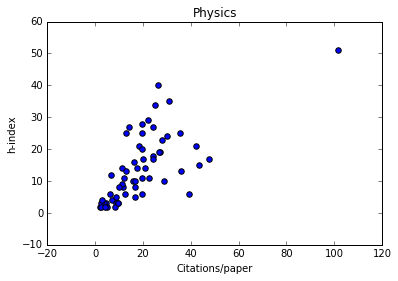

In [202]:
check = [np.sqrt(6.0)*np.log(2.0)*np.sqrt(a)/np.pi for a in tot]
#pl.scatter([np.log(b) for b in cs],[np.log(b) for b in check],c='r')
#pl.scatter([np.log(b) for b in cs],[np.log(b) for b in hi])
#pl.scatter(cs,check,c='r',s=30.0)
pl.scatter(cs,hi,s=30.0)
pl.xlabel('Citations/paper')
pl.ylabel('h-index')
pl.title('Physics')
pl.savefig('qs_chem_cites_h_individuals.png')

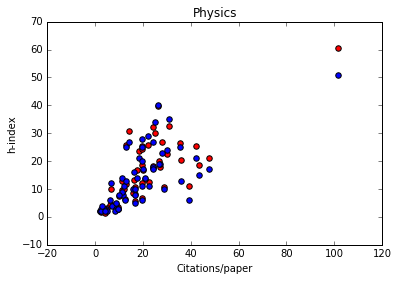

In [204]:
check = [np.sqrt(6.0)*np.log(2.0)*np.sqrt(a)/np.pi for a in tot]
#pl.scatter([np.log(b) for b in cs],[np.log(b) for b in check],c='r')
#pl.scatter([np.log(b) for b in cs],[np.log(b) for b in hi])
pl.scatter(cs,check,c='r',s=30.0)
pl.scatter(cs,hi,s=30.0)
pl.xlabel('Citations/paper')
pl.ylabel('h-index')
pl.title('Physics')
pl.savefig('qs_chem_cites_h_individuals.png')

C:\Users\amtrjs\AppData\Local\Continuum\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:209: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\amtrjs\AppData\Local\Continuum\Anaconda3\lib\site-packages\openpyxl\workbook\names\named_range.py:124: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


['All', 'MATHS', 'CHEMISTRY', 'PHYSICS', 'FOOD']


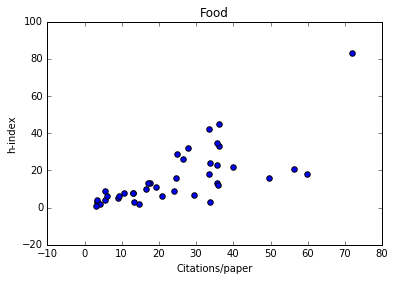

In [226]:
qwe = openpyxl.load_workbook('Scopus_MAPS.xlsx')
print(qwe.get_sheet_names())
ws = qwe["FOOD"]
cs = []
hi = []
tot = []
for i in range(2,48): #add largest row value
    wer = ws.cell(row = i, column = 2).value
    if type(wer) == int:
        asd = citations_per_paper(wer)
        cs.append(asd[2])
        hi.append(asd[3])
        tot.append(asd[0])
pl.scatter(cs,hi,s=30.0)
pl.xlabel('Citations/paper')
pl.ylabel('h-index')
pl.title('Food')
pl.savefig('qs_food_cites_h_individuals.png')

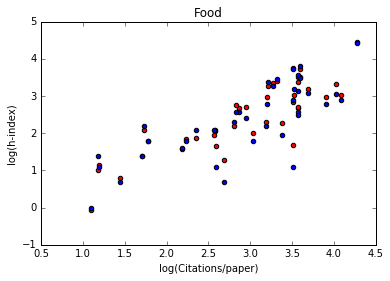

In [227]:
check = [np.sqrt(6.0)*np.log(2.0)*np.sqrt(a)/np.pi for a in tot]
pl.scatter([np.log(b) for b in cs],[np.log(b) for b in check],c='r')
pl.scatter([np.log(b) for b in cs],[np.log(b) for b in hi])
pl.xlabel('log(Citations/paper)')
pl.ylabel('log(h-index)')
pl.title('Food')
pl.savefig('qs_food_cites_h_check.png')

In [229]:
qwe = openpyxl.load_workbook('Scopus_MAPS.xlsx')
print(qwe.get_sheet_names())
ws = qwe["FOOD"]
for i in range(2,74): #add largest row value
    wer = ws.cell(row = i, column = 2).value
    if type(wer) == int:
        print(i,citations_per_paper(wer))
        

C:\Users\amtrjs\AppData\Local\Continuum\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:209: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\amtrjs\AppData\Local\Continuum\Anaconda3\lib\site-packages\openpyxl\workbook\names\named_range.py:124: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


['All', 'MATHS', 'CHEMISTRY', 'PHYSICS', 'FOOD']
2 (324, 11, 29.454545454545453, 7)
3 (282, 17, 16.58823529411765, 10)
4 (1450, 43, 33.72093023255814, 24)
5 (6243, 186, 33.564516129032256, 42)
6 (210, 16, 13.125, 8)
7 (187, 9, 20.77777777777778, 6)
8 (80, 9, 8.88888888888889, 5)
9 (1326, 54, 24.555555555555557, 16)
10 (723, 41, 17.634146341463413, 13)
12 (2033, 51, 39.86274509803921, 22)
13 (44, 3, 14.666666666666666, 2)
14 (2747, 104, 26.41346153846154, 26)
15 (148, 14, 10.571428571428571, 8)
16 (714, 20, 35.7, 13)
17 (831, 49, 16.959183673469386, 13)
18 (1002, 30, 33.4, 18)
20 (55, 10, 5.5, 4)
21 (33, 10, 3.3, 3)
22 (219, 39, 5.615384615384615, 9)
24 (5797, 160, 36.23125, 45)
25 (93, 7, 13.285714285714286, 3)
26 (101, 3, 33.666666666666664, 3)
27 (751, 21, 35.76190476190476, 12)
28 (2644, 47, 56.255319148936174, 21)
29 (3846, 106, 36.283018867924525, 33)
30 (17, 4, 4.25, 2)
31 (1434, 24, 59.75, 18)
32 (2927, 82, 35.69512195121951, 23)
33 (3, 1, 3.0, 1)
34 (3076, 111, 27.7117117117117

In [243]:
m = "jan"
set(m)

{'a', 'j', 'n'}